In [1]:
import nltk
from nltk.corpus import *
from collections import defaultdict, Counter
from operator import itemgetter
import re
from sklearn.metrics import confusion_matrix

__◑ Use sorted() and set() to get a sorted list of tags used in the Brown corpus, removing duplicates.__

In [2]:
all_tags = sorted(set([tag for (w, tag) in brown.tagged_words()]))

In [3]:
print(*all_tags)

' '' ( (-HL ) )-HL * *-HL *-NC *-TL , ,-HL ,-NC ,-TL -- ---HL . .-HL .-NC .-TL : :-HL :-TL ABL ABN ABN-HL ABN-NC ABN-TL ABX AP AP$ AP+AP-NC AP-HL AP-NC AP-TL AT AT-HL AT-NC AT-TL AT-TL-HL BE BE-HL BE-TL BED BED* BED-NC BEDZ BEDZ* BEDZ-HL BEDZ-NC BEG BEM BEM* BEM-NC BEN BEN-TL BER BER* BER*-NC BER-HL BER-NC BER-TL BEZ BEZ* BEZ-HL BEZ-NC BEZ-TL CC CC-HL CC-NC CC-TL CC-TL-HL CD CD$ CD-HL CD-NC CD-TL CD-TL-HL CS CS-HL CS-NC CS-TL DO DO* DO*-HL DO+PPSS DO-HL DO-NC DO-TL DOD DOD* DOD*-TL DOD-NC DOZ DOZ* DOZ*-TL DOZ-HL DOZ-TL DT DT$ DT+BEZ DT+BEZ-NC DT+MD DT-HL DT-NC DT-TL DTI DTI-HL DTI-TL DTS DTS+BEZ DTS-HL DTX EX EX+BEZ EX+HVD EX+HVZ EX+MD EX-HL EX-NC FW-* FW-*-TL FW-AT FW-AT+NN-TL FW-AT+NP-TL FW-AT-HL FW-AT-TL FW-BE FW-BER FW-BEZ FW-CC FW-CC-TL FW-CD FW-CD-TL FW-CS FW-DT FW-DT+BEZ FW-DTS FW-HV FW-IN FW-IN+AT FW-IN+AT-T FW-IN+AT-TL FW-IN+NN FW-IN+NN-TL FW-IN+NP-TL FW-IN-TL FW-JJ FW-JJ-NC FW-JJ-TL FW-JJR FW-JJT FW-NN FW-NN$ FW-NN$-TL FW-NN-NC FW-NN-TL FW-NN-TL-NC FW-NNS FW-NNS-NC FW-NNS-TL 

__◑ Write programs to process the Brown Corpus and find answers to the following questions:__

Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)

Which word has the greatest number of distinct tags. What are they, and what do they represent?

List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

Which tags are nouns most commonly found after? What do these tags represent?

In [34]:
# NUMBER 1
all_nouns_sing = [w.lower() for (w, tag) in brown.tagged_words() if tag == "NN"] # will consider only sing or plural nouns (no posessives, titles etc.)
all_nouns_pl = [w.lower() for (w, tag) in brown.tagged_words() if tag == "NNS"]

pl_noun_more_freq = []

In [35]:
sing_freq_n = nltk.FreqDist(all_nouns_sing)
pl_freq_n = nltk.FreqDist(all_nouns_pl)

In [36]:
for noun in set(all_nouns_sing):
    if (noun + "s") in all_nouns_pl:
        if sing_freq_n[noun] < pl_freq_n[noun + "s"]:
            pl_noun_more_freq.append(noun)
    elif (noun + "es") in all_nouns_pl:
        if sing_freq_n[noun] < pl_freq_n[noun + "es"]:
            pl_noun_more_freq.append(noun)

In [38]:
print(*pl_noun_more_freq[:30])  # it has some words that do not fit requirements (us, met), since we identified pl only by adding "s" 

regulation tear asset document interval racketeer slack expectation wave crackpot paragraph intellectual third soybean gasp meter us scholar senator dollar reinforcement revision egg probe expert overture tablespoon bead disclosure song


In [307]:
## NUMBER 2
all_word_cfd = nltk.ConditionalFreqDist([(w.lower(), tag) for (w, tag) in brown.tagged_words()])

best = 0
most_tags = ""
for condition in all_word_cfd.conditions():
    if len(all_word_cfd[condition]) > best:
        best = len(all_word_cfd[condition])
        most_tags = condition

In [48]:
print("The word with most tags is {} and the tags are".format(most_tags))
all_word_cfd[most_tags]

The word with most tags is that and the tags are


FreqDist({'CS': 6464, 'DT': 2260, 'WPS': 1654, 'WPO': 135, 'QL': 56, 'DT-NC': 6, 'DT-TL': 5, 'WPS-TL': 3, 'WPS-NC': 3, 'CS-NC': 2, ...})

In [49]:
# NUMBER 3
# List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
all_tags_freq = nltk.FreqDist([tag for (w, tag) in brown.tagged_words()])
all_tags_freq.most_common(20)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

In [50]:
# NUMBER 4
# Which tags are nouns most commonly found after? What do these tags represent?

before_n_tags = []
for (w1, t1), (w2, t2) in nltk.bigrams(brown.tagged_words()):
    if t2.startswith("NN"):
        before_n_tags.append(t1)

nltk.FreqDist(before_n_tags).most_common(10)

[('AT', 59656),
 ('JJ', 40864),
 ('IN', 24012),
 ('NN', 17789),
 ('PP$', 12241),
 ('CC', 6610),
 ('CD', 5264),
 ('AP', 5112),
 ('DT', 4540),
 ('VBG', 4407)]

__◑ Explore the following issues that arise in connection with the lookup tagger:__

What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?

Consider the curve in 4.2; suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?

In [52]:
slice = int(len(brown.tagged_sents()) * 0.9)

In [54]:
lookup_tagger = nltk.UnigramTagger(brown.tagged_sents()[:slice])
lookup_tagger.evaluate(brown.tagged_sents()[slice:])

0.8849353534083527

In [288]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    lookup_tagger = nltk.UnigramTagger(model=lt)
    return lookup_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

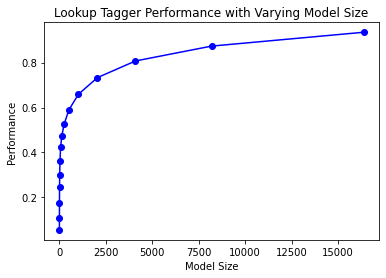

In [289]:
display()

__◑ What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)__

In [64]:
cfd_all = nltk.ConditionalFreqDist((w.lower(), tag) for (w, tag) in brown.tagged_words()) # for a given word, indicates which tag is most likely
word_most_likely_tag = []

for word in cfd_all.conditions():
    word_most_likely_tag.append((word,cfd_all[word].most_common(1)))

In [65]:
word_most_likely_tag[:10]

[('the', [('AT', 69013)]),
 ('fulton', [('NP-TL', 10)]),
 ('county', [('NN-TL', 83)]),
 ('grand', [('JJ', 30)]),
 ('jury', [('NN', 63)]),
 ('said', [('VBD', 1747)]),
 ('friday', [('NR', 55)]),
 ('an', [('AT', 3706)]),
 ('investigation', [('NN', 43)]),
 ('of', [('IN', 35028)])]

__◑ Generate some statistics for tagged data to answer the following questions:__

What proportion of word types are always assigned the same part-of-speech tag?

How many words are ambiguous, in the sense that they appear with at least two tags?

What percentage of word tokens in the Brown Corpus involve these ambiguous words?

In [78]:
one_tag_words = []
for word in cfd_all.conditions():
    if len(cfd_all[word]) == 1:
        one_tag_words.append((word, cfd_all[word].keys()))

In [83]:
one_tag_words[:20]  # it can be noticed that punc are always assigned the same tag :)

[("atlanta's", dict_keys(['NP$'])),
 ('``', dict_keys(['``'])),
 ("''", dict_keys(["''"])),
 ('irregularities', dict_keys(['NNS'])),
 ('took', dict_keys(['VBD'])),
 ('term-end', dict_keys(['NN'])),
 ('presentments', dict_keys(['NNS'])),
 ('deserves', dict_keys(['VBZ'])),
 ('manner', dict_keys(['NN'])),
 ('september-october', dict_keys(['NP'])),
 ('durwood', dict_keys(['NP'])),
 ('pye', dict_keys(['NP'])),
 ('investigate', dict_keys(['VB'])),
 ('possible', dict_keys(['JJ'])),
 ('hard-fought', dict_keys(['JJ'])),
 ('mayor-nominate', dict_keys(['NN-TL'])),
 ('ivan', dict_keys(['NP'])),
 ('handful', dict_keys(['NN'])),
 ("georgia's", dict_keys(['NP$'])),
 ('registration', dict_keys(['NN']))]

In [88]:
# How many words are ambiguous, in the sense that they appear with at least two tags?
ambiguous_tags_words = []
for word in cfd_all.conditions():
    if len(cfd_all[word]) > 1:
        ambiguous_tags_words.append((word, list(cfd_all[word].keys())))

In [89]:
len(ambiguous_tags_words)

9580

In [90]:
ambiguous_tags_words[:20]  # Yet, we see here a punc "." assigned two tags

[('the', ['AT', 'AT-TL', 'AT-HL', 'AT-NC', 'NIL', 'AT-TL-HL']),
 ('fulton', ['NP-TL', 'NP']),
 ('county', ['NN-TL', 'NN', 'NN-HL']),
 ('grand', ['JJ-TL', 'JJ', 'FW-JJ-TL']),
 ('jury', ['NN-TL', 'NN', 'NN-HL']),
 ('said', ['VBD', 'VBN', 'VBN-HL']),
 ('friday', ['NR', 'NR-TL', 'NP']),
 ('an', ['AT', 'AT-HL', 'AT-TL', 'NIL', 'AT-NC', 'CC']),
 ('investigation', ['NN', 'NN-TL']),
 ('of', ['IN', 'IN-TL', 'IN-HL', 'IN-TL-HL', 'IN-NC', 'NIL']),
 ('recent', ['JJ', 'JJ-HL']),
 ('primary', ['NN', 'JJ', 'JJ-HL']),
 ('election', ['NN', 'NN-TL']),
 ('produced', ['VBD', 'VBN']),
 ('no', ['AT', 'RB', 'AT-HL', 'AT-TL', 'QL', 'RB-NC']),
 ('evidence', ['NN', 'VB']),
 ('that',
  ['CS',
   'WPS',
   'DT',
   'QL',
   'WPO',
   'CS-HL',
   'DT-TL',
   'WPS-TL',
   'DT-HL',
   'DT-NC',
   'NIL',
   'WPS-NC',
   'WPO-NC',
   'CS-NC',
   'WPS-HL']),
 ('any', ['DTI', 'QL', 'DTI-HL', 'DTI-TL', 'RB']),
 ('place', ['NN', 'VB', 'NN-TL', 'NP', 'NN-HL', 'FW-NN-TL', 'NN-NC']),
 ('.', ['.', '.-HL'])]

In [94]:
# What percentage of word tokens in the Brown Corpus involve these ambiguous words?
ambigous_words = [w for (w, tags) in ambiguous_tags_words]

intersection = list(set(brown.words()) & set(ambigous_words))
print("Percentage calculated with set of tokens is -", len(set(intersection))/len(set(brown.words())))

Percentage calculated with set of tokens is - 0.15095349376527464


In [102]:
len(set(brown.words()))  # unique words in brown corpus

56057

__◑ The evaluate() method works out how accurately the tagger performs on this text. For example, if the supplied tagged text was [('the', 'DT'), ('dog', 'NN')] and the tagger produced the output [('the', 'NN'), ('dog', 'NN')], then the score would be 0.5. Let's try to figure out how the evaluation method works:__

A tagger t takes a list of words as input, and produces a list of tagged words as output. However, t.evaluate() is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging?

Once the tagger has created newly tagged text, how might the evaluate() method go about comparing it with the original tagged text and computing the accuracy score?

Now examine the source code to see how the method is implemented. Inspect nltk.tag.api.__file__ to discover the location of the source code, and open this file using an editor (be sure to use the api.py file and not the compiled api.pyc binary file).

In [105]:
help(nltk.tag)

Help on package nltk.tag in nltk:

NAME
    nltk.tag - NLTK Taggers

DESCRIPTION
    This package contains classes and interfaces for part-of-speech
    tagging, or simply "tagging".
    
    A "tag" is a case-sensitive string that specifies some property of a token,
    such as its part of speech.  Tagged tokens are encoded as tuples
    ``(tag, token)``.  For example, the following tagged token combines
    the word ``'fly'`` with a noun part of speech tag (``'NN'``):
    
        >>> tagged_tok = ('fly', 'NN')
    
    An off-the-shelf tagger is available for English. It uses the Penn Treebank tagset:
    
        >>> from nltk import pos_tag, word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
    
    A Russian tagger is also available if you specify lang="rus". It uses
    the R

In [ ]:
# from nltk.tag.api 
# relies accuracy from nltk.metrics

def accuracy(self, gold):
        """
        Score the accuracy of the tagger against the gold standard.
        Strip the tags from the gold standard text, retag it using
        the tagger, then compute the accuracy score.

        :param gold: The list of tagged sentences to score the tagger on.
        :type gold: list(list(tuple(str, str)))
        :rtype: float
        """

    tagged_sents = self.tag_sents(untag(sent) for sent in gold)
    gold_tokens = list(chain.from_iterable(gold))
    test_tokens = list(chain.from_iterable(tagged_sents))
    return accuracy(gold_tokens, test_tokens)

__◑ Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:__

Produce an alphabetically sorted list of the distinct words tagged as MD.

Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).

Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).

What is the ratio of masculine to feminine pronouns?

In [115]:
# Produce an alphabetically sorted list of the distinct words tagged as MD.
md_words = sorted(set([w.lower() for (w, tag) in brown.tagged_words() if tag == "MD"]))
print("There are {} modals in brown corpus, first 15 of which are\n{}".format(len(md_words), md_words[:15]), end = "")

There are 26 modals in brown corpus, first 15 of which are
["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought']

In [117]:
# Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).
nns = set([w.lower() for (w, tag) in brown.tagged_words() if tag == "NNS"])
vbz = set([w.lower() for (w, tag) in brown.tagged_words() if tag == "VBZ"])
both_nns_vbz = list(nns & vbz)

In [119]:
print("There are {} words which are both NNS and VBZ in brown corpus, first 10 of which are\n{}".format(len(both_nns_vbz), both_nns_vbz[:15]), end = "")

There are 425 words which are both NNS and VBZ in brown corpus, first 10 of which are
['values', 'conflicts', 'desires', 'breaks', 'dashes', 'clutches', 'runs', 'totals', 'fields', 'looks', 'tests', 'wonders', 'senses', 'upsets', 'trades']

In [127]:
# Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).
prep_phr = []
for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(brown.tagged_words()):
    if t1.startswith("IN") and t2.startswith("DT") and t3.startswith("NN"):  # brown corpus does not have DET tag
        prep_phr.append((w1, w2, w3))

In [131]:
prep_phr[:10]

[('of', 'this', 'city'),
 ('of', 'this', 'money'),
 ('of', 'these', 'funds'),
 ('in', 'each', 'county'),
 ('for', 'some', 'time'),
 ('in', 'this', 'county'),
 ('on', 'this', 'question'),
 ('with', 'any', 'relatives'),
 ('in', 'this', 'case'),
 ('of', 'that', 'court')]

In [134]:
# What is the ratio of masculine to feminine pronouns?

# Tags in brown corpus do not differentitae between masc and fem pronouns so I will try to manually do it with only PP$ posessives
pronouns = [w.lower() for (w, tag) in brown.tagged_words() if tag == "PP$"]

In [137]:
masc = sum([1 for p in pronouns if p == "his"])
fem = sum([1 for p in pronouns if p == "her"])
masc/fem

3.608311688311688

__◑ In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.__

In [146]:
adverbs_before_qualifiers = []
for (w1, t1), (w2, t2) in nltk.bigrams(brown.tagged_words()):
    if (t1.startswith("QL") or t1.startswith("RB")) and re.search(r'\b(adore|love|prefer|like)', w2):
        adverbs_before_qualifiers.append((w1, w2))

In [147]:
len(adverbs_before_qualifiers)

173

In [149]:
# since brown corpus tags adverbs such as "absolutely" with different tags (QL andd RB), 
# those were used above, whci gives unrelated results sometimes
adverbs_before_qualifiers[:20] 

[('just', 'like'),
 ('most', 'likely'),
 ('always', 'like'),
 ('together', 'like'),
 ('just', 'like'),
 ('also', 'likes'),
 ('certainly', 'preferred'),
 ('as', 'likely'),
 ('somewhat', 'like'),
 ('more', 'like'),
 ('ago', 'cypress-like'),
 ('increasingly', 'like'),
 ('more', 'likely'),
 ('most', 'likely'),
 ('longer', 'loves'),
 ('just', 'like'),
 ('so', 'loved'),
 ('so', 'loved'),
 ('as', 'likely'),
 ('around', 'like')]

__◑ We defined the regexp_tagger that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with -s as a plural noun. Define a regular expression tagger (using RegexpTagger()) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)__

In [16]:
patterns = [
     (r'\w+ing$', 'VBG'),                     # gerunds
     (r'\w+ed$', 'VBD'),                      # simple past
     (r'\w+[aeoui]es$', 'VBZ'),               # 3rd singular present
     (r'\w+ould$', 'MD'),                     # modals
     (r'\w+\'s$', 'NN$'),                     # possessive nouns
     (r'\w+s$', 'NNS'),                       # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
     (r'\w+(ly|wards&|wise)$', 'RB'),                          # adverbs 
     (r'\w+(ness|ion|istism|ship|ity|ment|hood)$', 'NN'),      # nouns (suffixes)
     (r'\w+(less|ous|like|ful|able)', 'JJ'),                   # adjectives (default)
    
     (r'.*', 'NN')                      # nouns (default)
]

In [17]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.evaluate(brown.tagged_sents())  # not much better than the regexp tagger in the book, which got 0.203

0.21477326746997913

__◑ Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its accuracy() method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?__

In [164]:
patterns_2 = [
     (r'\w+ing$', 'VERB'),                     # gerunds
     (r'\w+ed$', 'VERB'),                      # simple past
     (r'\w+[aeoui]es$', 'VERB'),               # 3rd singular present
     (r'(s?he|I|we|the[ym]|your?s?|me|his|her|our|their)', 'PRON'),                     # modals
     (r'\w+\'s$', 'NOUN'),                     # possessive nouns
     (r'\w+s$', 'NOUN'),                       # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'NUM'),        # cardinal numbers
     (r'\w+(ly|wards&|wise)$', 'ADV'),                           # adverbs 
     (r'\w+(ness|ion|istism|ship|ity|ment|hood)$', 'NOUN'),      # nouns (suffixes)
     (r'\w+(less|ous|like|ful|able)', 'ADJ'),                    # adjectives (default)
     (r'[.,!?:;]', '.'),                      # punctutation
     (r'.*', 'NOUN')                         # nouns (default)
]

In [167]:
regexp_tagger_2 = nltk.RegexpTagger(patterns_2)
regexp_tagger_2.evaluate(treebank.tagged_sents(tagset='universal'))  # let's try with simplified tagset

0.44353172553538084

Not surprisingly, the simplified tagset gives higher accuracy with the same regexp patterns, since we do not have to predict the exact tag as in "RB", "RB$", "RB+BEZ", "RB+BEZ-HL" etc.

__◑ How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of 105 and a tagset size of 102.__

In [184]:
from matplotlib import pyplot as plt
results = []
ngrams = []

for ngram in range(1,7):
    model = nltk.NgramTagger(ngram, brown.tagged_sents()[slice:])
    results.append(model.evaluate(brown.tagged_sents()[slice:]))
    ngrams.append(ngram)

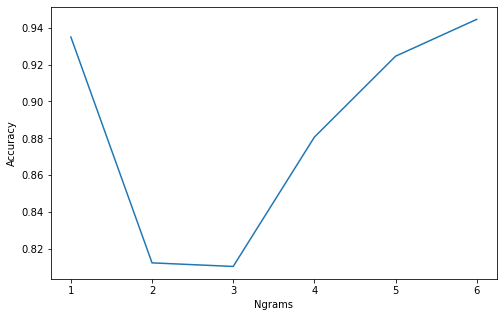

In [188]:
plt.figure(figsize=(8,5))
plt.plot(ngrams, results)
plt.xlabel("Ngrams")
plt.ylabel("Accuracy")
plt.show()

I am quite surprised to see that the higher is the N in grams, the better is the accuracy, at least in the rabge from 1 to 6. The worst performing ngrams are bigrams and trigrams

__◑ Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.__

__◑ 4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.__

In [218]:
perfs = []
for percent in list(range(10, 90, 10)):
    slice_ = int(len(brown.tagged_sents()) * (percent/100))
    model = nltk.UnigramTagger(brown.tagged_sents()[:slice_])
    perfs.append(model.evaluate(brown.tagged_sents()[slice_:]))

In [290]:
def display_vocab_size():
    import pylab
    pylab.plot(list(range(10, 90, 10)), perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Vocab Size')
    pylab.xlabel('Vocab Size in Percentage')
    pylab.ylabel('Performance')
    pylab.show()

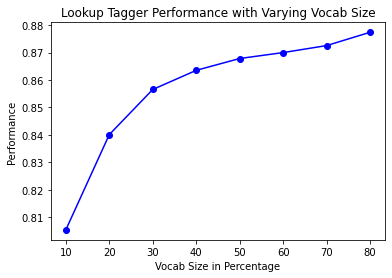

In [291]:
display_vocab_size()

__◑ Inspect the confusion matrix for the bigram tagger t2 defined in 5, and identify one or more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.__

In [18]:
size = int(len(brown.tagged_sents()) * 0.9)
train_sents = brown.tagged_sents()[:size]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

In [233]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(confusion_matrix(gold_tags, test_tags))   # too many tags in the confusion matrix, so it does not fit neatly in my screen

[[ 19   0   0 ...   0   0   0]
 [  0 382   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ... 238   0   0]
 [  0   0   0 ...   2   1   0]
 [  0   0   0 ...   0   0 396]]


In [ ]:
# I will come back to this one later

__◑ Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.__

In [234]:
# I already implemented a Regexp Tagger with simplified tagset from treebank, so now I will try out ngram taggers
size_ = int(len(treebank.tagged_sents(tagset='universal')) * 0.9)
train_simplified = treebank.tagged_sents(tagset='universal')[:size]
test_simplified = treebank.tagged_sents(tagset='universal')[:size]

unigram_tagger = nltk.UnigramTagger(train_simplified)
unigram_tagger.evaluate(test_simplified)

0.9738070642456991

In [235]:
bigram_tagger = nltk.BigramTagger(train_simplified)
bigram_tagger.evaluate(test_simplified)

0.9333902816957368

In [239]:
results_simple = []

for ngram in range(1,7):
    model = nltk.NgramTagger(ngram, train_simplified)
    results_simple.append(model.evaluate(test_simplified))

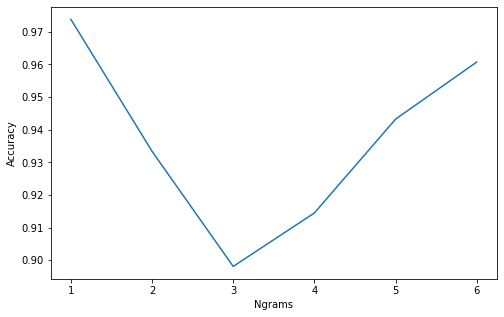

In [240]:
plt.figure(figsize=(8,5))
plt.plot(range(1,7), results_simple)
plt.xlabel("Ngrams")
plt.ylabel("Accuracy")
plt.show()

Quite similar tendency as with the brown corpus, yet the overall accuracy is higher than in brown corpus since the tags are simplified

__◑ Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?__

It reminds me of a question I recently encounter on stackoverflow. The question can be found here https://stackoverflow.com/questions/26739505/python-nltk-ngram-tagger-with-token-context-rather-than-tag-context  

I guess the problem that was described there answers to this question. Bigrams tagger looks at the previous tag, while in some cases (as in the case of the question in stackoverflow) looking at the previuos word itslef might be preferable. The way how to do it in Python is already up on stackoverflow.

In [241]:
class myNgramTagger(nltk.NgramTagger):
    """
    My override of the NLTK NgramTagger class that considers previous
    tokens rather than previous tags for context.
    """
    def __init__(self, n, train=None, model=None,
                 backoff=None, cutoff=0, verbose=False):
        nltk.NgramTagger.__init__(self, n, train, model, backoff, cutoff, verbose)

    def context(self, tokens, index, history):
        #tag_context = tuple(history[max(0,index-self._n+1):index])
        tag_context = tuple(tokens[max(0,index-self._n+1):index])
        return tag_context, tokens[index]

In [19]:
test_sents = brown.tagged_sents()[size:]
model_bi_new = myNgramTagger(2, train_sents)
model_bi_new.evaluate(test_sents)  # Well, Brown is not an example of a corpus that needs to be tagged this way, this is only to demonstrate

NameError: name 'myNgramTagger' is not defined

__◑ Preprocess the Brown News data by replacing low frequency words with UNK, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now?__

In [257]:
all_news_words = [w.lower() for w in brown.words(categories="news")]
freq_news = nltk.FreqDist(all_news_words)
# all_news_tags = [(w.lower(), tag) for (w, tag) in brown.tagged_words(categories="news")]

In [252]:
least_ = int(len(freq_news) * 0.1)
least_freq = sorted(freq_news.items(), key = itemgetter(1))[:least_]

In [281]:
sentences_news = [list()for _ in range(len(brown.tagged_sents(categories="news")))]
for idx, sent in enumerate(brown.tagged_sents(categories="news")):
    for (w, tag) in sent:
        if w in least_freq:
            sentences_news[idx].append(("UNK", tag))
        else:
            sentences_news[idx].append((w, tag))

In [283]:
size_news = int(len(sentences_news) * 0.9)
train_news = sentences_news[:size_news]
test_news = sentences_news[size_news:]

In [284]:
model_1 = nltk.DefaultTagger('NN')
model_2 = nltk.UnigramTagger(train_news, backoff=model_1)
model_3 = nltk.BigramTagger(train_news, backoff=model_2)

In [285]:
model_3.evaluate(test_news) # compared to 0.844513 when he model was used with all tagged brown_sents (no UNK replacement)

0.8452108043456593

__◑ Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing pylab.plot() with pylab.semilogx(). What do you notice about the shape of the resulting plot? Does the gradient tell you anything?__

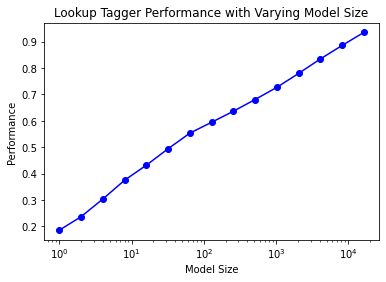

In [292]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display_2():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.semilogx(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display_2()

__◑ Consult the documentation for the Brill tagger demo function, using help(nltk.tag.brill.demo). Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?__

In [294]:
help(nltk.tag.brill)

Help on module nltk.tag.brill in nltk.tag:

NAME
    nltk.tag.brill

DESCRIPTION
    # -*- coding: utf-8 -*-
    # Natural Language Toolkit: Transformation-based learning
    #
    # Copyright (C) 2001-2021 NLTK Project
    # Author: Marcus Uneson <marcus.uneson@gmail.com>
    #   based on previous (nltk2) version by
    #   Christopher Maloof, Edward Loper, Steven Bird
    # URL: <http://nltk.org/>
    # For license information, see  LICENSE.TXT

CLASSES
    nltk.tag.api.TaggerI(builtins.object)
        BrillTagger
    nltk.tbl.feature.Feature(builtins.object)
        Pos
        Word
    
    class BrillTagger(nltk.tag.api.TaggerI)
     |  BrillTagger(initial_tagger, rules, training_stats=None)
     |  
     |  Brill's transformational rule-based tagger.  Brill taggers use an
     |  initial tagger (such as ``tag.DefaultTagger``) to assign an initial
     |  tag sequence to a text; and then apply an ordered list of
     |  transformational rules to correct the tags of individual toke

In [63]:
from nltk.tag import brill_trainer, brill

rules = brill.templates.fntbl37()

In [61]:
bigram_t = nltk.tag.BigramTagger(train_sents)
brill_t = brill_trainer.BrillTaggerTrainer(bigram_t, rules, trace=3)
brill_t = brill_t.train(train_sents, max_rules=250)
brill_t.evaluate(test_sents)

In [64]:
def train_brill_tagger(initial_tagger, train_sents, **kwargs):
    templates = [
            brill.Template(brill.Pos([-1])),
            brill.Template(brill.Pos([1])),
            brill.Template(brill.Pos([-2])),
            brill.Template(brill.Pos([2])),
            brill.Template(brill.Pos([-2, -1])),
            brill.Template(brill.Pos([1, 2])),
            brill.Template(brill.Pos([-3, -2, -1])),
            brill.Template(brill.Pos([1, 2, 3])),
            brill.Template(brill.Pos([-1]), brill.Pos([1])),
            brill.Template(brill.Word([-1])),
            brill.Template(brill.Word([1])),
            brill.Template(brill.Word([-2])),
            brill.Template(brill.Word([2])),
            brill.Template(brill.Word([-2, -1])),
            brill.Template(brill.Word([1, 2])),
            brill.Template(brill.Word([-3, -2, -1])),
            brill.Template(brill.Word([1, 2, 3])),
            brill.Template(brill.Word([-1]), brill.Word([1])),
            ]
      
    # Using BrillTaggerTrainer to train 
    trainer = brill_trainer.BrillTaggerTrainer(
            initial_tagger, templates, deterministic = True)
      
    return trainer.train(train_sents, **kwargs)

In [ ]:
brill = train_brill_tagger(nltk.UnigramTagger(train_sents), train_sents)

In [ ]:
brill.evaluate(test_sents)

__◑ Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. wordi → tagi → tagi+1.__

In [300]:
set_dict = defaultdict(lambda: defaultdict(set))

In [302]:
for (w1, t1), (w2, t2) in nltk.bigrams(brown.tagged_words()):
    set_dict[w1][t1] = t2

In [304]:
set_dict["that"]

defaultdict(set,
            {'CS': 'AT',
             'WPS': 'VBD',
             'DT': 'NN',
             'QL': 'JJ',
             'WPO': 'PPS',
             'CS-HL': 'EX',
             'DT-NC': 'BEDZ-NC',
             'NIL': 'NIL',
             'WPS-NC': 'BEDZ-NC',
             'WPO-NC': 'PPSS-NC',
             'CS-NC': 'PPSS-NC',
             'WPS-HL': 'VB-HL'})

__★ There are 264 distinct words in the Brown Corpus having exactly three possible tags.__

Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column.

For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag.

In [310]:
cfd_brown = nltk.ConditionalFreqDist([(w.lower(), tag) for (w, tag) in brown.tagged_words()])
dict_num_of_tags = defaultdict(lambda: list())

for word in cfd_brown.conditions():
    dict_num_of_tags[len(cfd_brown[word])].append(word)

In [312]:
dict_num_of_tags[1][:15] # only one tag words, first 15

["atlanta's",
 '``',
 "''",
 'irregularities',
 'took',
 'term-end',
 'presentments',
 'deserves',
 'manner',
 'september-october',
 'durwood',
 'pye',
 'investigate',
 'possible',
 'hard-fought']

In [314]:
dict_num_of_tags[max(dict_num_of_tags)]

['that']

In [321]:
that_tags = list(set([tag for (w, tag) in brown.tagged_words() if w == "that"]))
that_sents = []
idx = 0

for sent in brown.tagged_sents():
    for (w, tag) in sent:
        if w == "that" and tag in that_tags:
            that_tags.remove(tag)
            idx += 1
            print(str(idx)+".", *[w for (w, _) in sent], end = "\n\n")

1. The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .

2. Regarding Atlanta's new multi-million-dollar airport , the jury recommended `` that when the new management takes charge Jan. 1 the airport be operated in a manner that will eliminate political influences '' .

3. `` Actually , the abuse of the process may have constituted a contempt of the Criminal court of Cook county , altho vindication of the authority of that court is not the function of this court '' , said Karns , who is a City judge in East St. Louis sitting in Cook County court .

4. While the city council suggested that the Legislative Council might perform the review , Mr. Notte said that instead he will take up the matter with Atty. Gen. J. Joseph Nugent to get `` the benefit of his views '' .

5. He was able to smell a bargain -- and a masterpiece -- a continent away , and the Museum of Modern Art's Alfred Bar

__★ Write a program to classify contexts involving the word "must" according to the tag of the following word. Can this be used to discriminate between the epistemic and deontic uses of must?__

In [8]:
tags_after_must = defaultdict(lambda : list())

for sent in brown.tagged_sents():
    for (w1, t1), (w2, t2) in nltk.bigrams(sent):
        if w1 == "must":
            tags_after_must[t2].append(" ".join([w for (w, _) in sent]))

In [9]:
tags_after_must.keys()

dict_keys(['BE', 'VB', 'HV', '*', 'IN', "''", 'RB', ',', 'DO', 'PPSS', 'AT', '.', 'CC', 'BE-HL', 'VBZ', 'VB-HL', 'PPLS', 'NIL', 'RB-HL', 'ABX', 'PPO', 'NN', 'PPS', 'ABN'])

In [10]:
tags_after_must["BE"][:5]  # from first 5 examples it can be stated that the word "must" has epistemis use before tag "BE"

['The largest hurdle the Republicans would have to face is a state law which says that before making a first race , one of two alternative courses must be taken : 1',
 'On the negative side of the balance sheet must be set some disappointment that the United States leadership has not been as much in evidence as hoped for .',
 "The secretary's greatest achievement is perhaps the rekindling of NATO realization that East-West friction , wherever it take place around the globe , is in essence the general conflict between two entirely different societies , and must be treated as such without regard to geographical distance or lack of apparent connection .",
 "The small shops `` must be retained , for they provide essential service to the community '' , according to the resolution , which added that they `` also are the source of livelihood for thousands of our neighbors '' .",
 'The law which governs home rule charter petitions states that they must be referred to the chairman of the board 

In [13]:
# let us take a look at 1 example per tag
for tag in tags_after_must.keys():
    print("The tag is {}\n{}\n\n".format(tag, tags_after_must[tag][0]))

The tag is BE
The largest hurdle the Republicans would have to face is a state law which says that before making a first race , one of two alternative courses must be taken : 1


The tag is VB
Five per cent of the voters in each county must sign petitions requesting that the Republicans be allowed to place names of candidates on the general election ballot , or 2


The tag is HV
`` Certain people must have known about it '' .


The tag is *
He cited East Germany where after 15 years of Soviet rule it has become necessary to build a wall to keep the people in , and added , `` so long as people rebel , we must not give up '' .


The tag is IN
The increase in mechanical harvesting of cotton makes cleaning and drying equipment a must for modern gin operation .


The tag is ''
He said that from his experience of two years with Gen. Clay in West Berlin administration , that `` Russia respects our show of strength , but that presently we're not acting as we should and must '' .


The tag is R

From the example above, it can be assumed that "must usually occurs in deontonic use before tha tag "HV", which was my hypothesis from the beginning. So, let us print some more examples of "HV" tag.

In [15]:
for sent in tags_after_must["HV"][:5]:
    print("{}\n\n".format(sent))

`` Certain people must have known about it '' .


Mrs. Molvar , who kept reiterating her request that they `` please take a stand '' , said , `` We must have faith in somebody -- on the local level , and it wouldn't be possible for everyone to rush to a school to get their children '' .


The pretty coeds must have ogled him all day long -- but he dutifully kept his eye on the gravy .


What a swinging group they must have been when they first started entertaining ! !


With their huge backs and overdeveloped shoulders , both must have their clothes made to order .




__★ Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.__

Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best?

Try varying the size of the training corpus. How does it affect your results?

In [20]:
# regexp_tagger               # a regex tagger from above examples
# train_sents, test_sents     # from brown corpus, 0.9 used for train

In [23]:
# We already used different model sized above and different ngrams (1-6 grams), and already have taken a look
# at how the accuracy behaves as the sizes or ngram ranges change.
# That is why I do not see a point in doing all over again, so I will just make one model 
# with 6-gram tagger (which showed good accuracy) falling for a backoff in 5, 4, 3, 2, 1 grams. 
# At the end there will be a backoff for Regexp Tagger.
# Train and test sizes stay the same, 0.9 and 0.1 from Brown

t1 = nltk.NgramTagger(1, train_sents, backoff = regexp_tagger)
t2 = nltk.NgramTagger(2, train_sents, backoff = t1)
t3 = nltk.NgramTagger(3, train_sents, backoff = t2)
t4 = nltk.NgramTagger(4, train_sents, backoff = t3)
t5 = nltk.NgramTagger(5, train_sents, backoff = t4)
t6 = nltk.NgramTagger(6, train_sents, backoff = t5)

In [24]:
t6.evaluate(test_sents)  # Quite higher accuracy to what we have been geting earlier with t2 (BigramTagger)- t1 (UnigramTagger)- t0 (defaultTagger)

0.9168395465308774

__★ Our approach for tagging an unknown word has been to consider the letters of the word (using RegexpTagger()), or to ignore the word altogether and tag it as a noun (using nltk.DefaultTagger()). These methods will not do well for texts having new words that are not nouns. Consider the sentence I like to blog on Kim's blog. If blog is a new word, then looking at the previous tag (TO versus NP$) would probably be helpful. I.e. we need a default tagger that is sensitive to the preceding tag.__

Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word. (The best way to do this is to modify the source code for UnigramTagger(), which presumes knowledge of object-oriented programming in Python.)

Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at words), right before the usual default tagger.

Evaluate the contribution of this new unigram tagger.

In [28]:
class MyTagger(nltk.UnigramTagger):
    
    def __init__(self, train=None, model=None,
                 backoff=None, cutoff=0):
        nltk.UnigramTagger.__init__(self, train, model, backoff, cutoff)

    def context(self, tokens, index, history):
        if index == 0:
            return None
        else:
            return history[index-1]

In [29]:
#Using the same example from above until 6-grams
t1 = MyTagger(train_sents, backoff = regexp_tagger)
model2 = nltk.NgramTagger(2, train_sents, backoff = t1)
model3 = nltk.NgramTagger(3, train_sents, backoff = model2)
model4 = nltk.NgramTagger(4, train_sents, backoff = model3)
model5 = nltk.NgramTagger(5, train_sents, backoff = model4)
model6 = nltk.NgramTagger(6, train_sents, backoff = model5)

In [30]:
model6.evaluate(test_sents)  # lower accuracy than using a usual UnigramTagger 

0.8120324385490665

__★ Consider the code in 5 which determines the upper bound for accuracy of a trigram tagger. Review Abney's discussion concerning the impossibility of exact tagging (Church, Young, & Bloothooft, 1996). Explain why correct tagging of these examples requires access to other kinds of information than just words and tags. How might you estimate the scale of this problem?__

In [34]:
# defines upper boundary for 3-gram tagger
cfd_trigram = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])
            for sent in brown.tagged_sents()
            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd_trigram.conditions() if len(cfd_trigram[c]) > 1]
sum(cfd_trigram[c].N() for c in ambiguous_contexts) / cfd_trigram.N()  # the book had an ambiguity of 0.049 at that time

0.1163751063917183

I could not find the indicated article in open access, so I will just speculate what might be the scale of the stated problem. From the examples we have been seeing throughout the chapter, it is clear that tagging requires as much information as possible about the word itself and the tags of the words around it. We have noticed that from examples where an Ngram tagger with multiple backoffs has higher accuracy compared to the UnigramTagger or BigramTagger alone. Therefore, it could be assumed that tagging requires much more information than just the Ngram tags of the words before the target-word, since previous tags do not always contain enough information.

Also, some more information could be found in an article called "Part-of-Speech Tagging from 97% to 100%: Is It Time for Some Linguistics?" from Chris Manning. The author investigates the ways of improving POS atggers and comes to a conclusion that making gold standard tags more consistent could be one solution to higher accuracy in tagging.
Available here: https://nlp.stanford.edu/pubs/CICLing2011-manning-tagging.pdf

__★ Use some of the estimation techniques in nltk.probability, such as Lidstone or Laplace estimation, to develop a statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during testing were not seen during training.__

In [50]:
from nltk.util import unique_list
from nltk.probability import * 

tag_set = unique_list(tag for sent in brown.tagged_sents() for (word,tag) in sent)
symbols = unique_list(word for sent in brown.tagged_sents() for (word,tag) in sent)
trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)

In [48]:
def lidstone(gamma):
    return lambda fd, bins: LidstoneProbDist(fd, gamma, bins)

In [53]:
mle = lambda fd, bins: MLEProbDist(fd)

laplace = trainer.train_supervised(train_sents, estimator = LaplaceProbDist)  # the same as Lidstone with gamma=1
# lidstone_hmm = trainer.train_supervised(train_sents, estimator = lidstone(0.1))

In [ ]:
# print("Accuracy with Laplace estimator is {}\nwith Lidstone estimator is {}".format(laplace.entropy(test_sents), lidstone_.entropy(test_sents)))

__★ Inspect the diagnostic files created by the Brill tagger rules.out and errors.out. Obtain the demonstration code by accessing the source code (at http://www.nltk.org/code) and create your own version of the Brill tagger. Delete some of the rule templates, based on what you learned from inspecting rules.out. Add some new rule templates which employ contexts that might help to correct the errors you saw in errors.out.__